In [1]:
from google.colab import drive
drive.mount('/content/drive')




Mounted at /content/drive


In [209]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from datetime import timedelta
import calendar

In [3]:

# Load the Excel file with attendance data for all subjects
file_name = "/content/attendance_data.xlsx"
xlsx = pd.ExcelFile(file_name)


In [222]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
xlsx = pd.ExcelFile("attendance_data.xlsx")

def string_to_datetime(dates):
    
    datetime_map = {}
    for date in dates:

      datetime_map[datetime.strptime(date, "%d/%m/%y")] = date
    return datetime_map

def date_format(dates):

  for i in range(len(dates)):
    try:
        d,m,y = dates[i].split("/")
        if len(d)<2:
          d = "0" +d
        if len(m)<2:
          m = "0" +m
      
        dates[i] = d+"/" +m +"/" +y
    except:
      print("Here",dates[i])
  return dates
  







def plot_attendance(weekly_attendance,datetime_map,subject):
  histogram_y = []
  week_dates = []
  condition  =False
  for week_no in range(0,5):
    weekdates =[]
    if week_no!=4:
      histogram_y.append((start_date_datetime+timedelta(week_no*7+0)).strftime("%d/%m/%y"))
    
    for day_no in range(0,7):
    
        
      if start_date_datetime+timedelta(week_no*7+day_no)>last_day_dt:
        #print(start_date_datetime+timedelta(week_no*7+day_no))
        condition = True
        week_dates[-1].extend(weekdates)
        break
      curr = datetime_map.get(start_date_datetime+timedelta(week_no*7+day_no),0)
      if curr!=0:
        weekdates.append(curr)
    
    if condition:
      break
    week_dates.append(weekdates)
    
  #print(week_dates)
  #print()

  histogram_x = []

  for i in range(4):
    count  = 0
    for date in week_dates[i]:
      #print(date,end=" ")
    
      #print(weekly_attendance.loc[student_id,date].sum())
      count += weekly_attendance.loc[student_id,date].sum()
    histogram_x.append(count)

  #print(histogram_y)
  week_attendance = histogram_x
  week_starts = histogram_y
  week_starts = [datetime.strptime(d, '%d/%m/%y') for d in week_starts]

  # Calculate bar widths
  bar_widths = [(week_starts[i+1] - week_starts[i]).days for i in range(len(week_starts)-1)] + [7]

  # Plot histogram
  fig, ax = plt.subplots()
  ax.bar(week_starts, week_attendance, width=bar_widths, align='edge', color='teal', edgecolor='black')

  # Set x-axis ticks at the start of each week
  ax.set_xticks(week_starts,labels=histogram_y)
  ax.tick_params(axis='x', rotation=0, labelsize=8)

  # Set x-axis label
  ax.set_xlabel('Week starting on', fontsize=10)

  # Set y-axis label
  ax.set_ylabel('Attendance', fontsize=10)

  # Set title
  ax.set_title(' Student {} : Weekly Attendance for {}'.format(student_id,subject), fontsize=12)

  # Show plot
  plt.show()













def weeklyAttendance():
# Process each sheet separately
  for subject in xlsx.sheet_names:
      df = pd.read_excel(xlsx, sheet_name=subject, header=None)

      # Extract the date column
      dates = df.iloc[0, 3:].values.astype(str)
      dates = date_format(dates)

      datetime_map = string_to_datetime(dates)
    

      # Extract the student data
      students = df.iloc[1:, :3]
      students.columns = ["Old Roll no", "New Roll no", "Name"]
      students["New Roll no"] = students["New Roll no"].str.strip()
      students.set_index("New Roll no", inplace=True)
      students["Old Roll no"] = students["Old Roll no"].str.strip()
      students["Name"] = students["Name"].str.strip()

      # Convert attendance data to weekly totals
      weekly_attendance = pd.DataFrame(index=students.index, columns=dates)
      
      for col in range(3, len(dates)+3):
          # Convert attendance data to binary (1=attended, 0=absent)
          attendance = df.iloc[1:, col].fillna("A")
          attendance = attendance.replace("A",0)
          attendance = attendance.replace("P",1)

          for i in range(len(students.index)):
            student_id = students.index[i]
            student_attendance = attendance.iloc[i]

            weekly_attendance.iloc[i,col-3] = student_attendance
      #print(weekly_attendance.loc[students.index[1],:])
      plot_attendance(weekly_attendance,datetime_map,subject)
    


Please enter the student roll no:TIT01
Please enter the start date01/07/22


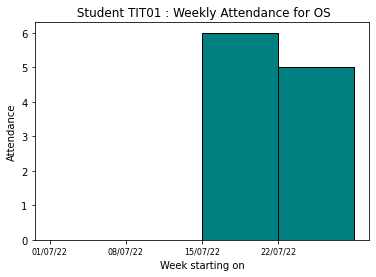

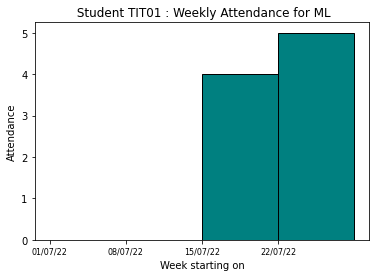

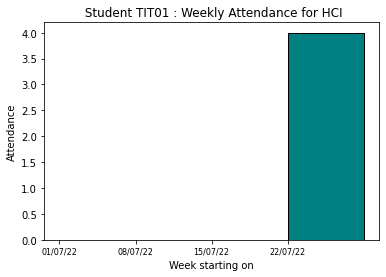

In [224]:

# student_id = "TIT01"
# start_date = "01/07/22"
student_id = input("Please enter the student roll no: ")
start_date = input("Please enter the start date: ")
start_date_datetime = datetime.strptime(start_date, "%d/%m/%y")

year = start_date_datetime.year
month = start_date_datetime.month
last_day = calendar.monthrange(year, month)[1]
last_day_dt = datetime( year,month,last_day )
weeklyAttendance()







[[], [], ['18/07/22', '19/07/22', '20/07/22', '21/07/22'], ['22/07/22', '25/07/22', '26/07/22', '27/07/22']]

18/07/22 0
19/07/22 1
20/07/22 0
21/07/22 1
22/07/22 1
25/07/22 2
26/07/22 1
27/07/22 1
['01/07/22', '08/07/22', '15/07/22', '22/07/22']


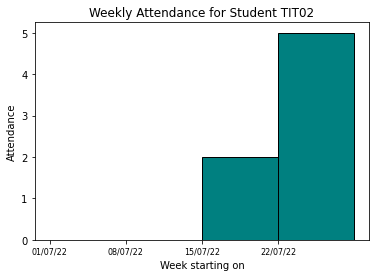

2022-08-01 00:00:00
[[], [], ['18/07/22', '19/07/22', '20/07/22', '21/07/22'], ['22/07/22', '25/07/22', '26/07/22', '27/07/22', '29/07/22']]

18/07/22 2
19/07/22 1
20/07/22 1
21/07/22 2
22/07/22 1
25/07/22 2
26/07/22 1
27/07/22 0
29/07/22 1
['01/07/22', '08/07/22', '15/07/22', '22/07/22']


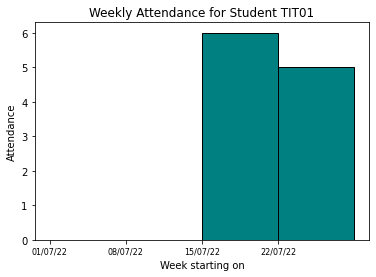